# TF_IDF

Выводим топ-100 важных слов для каждого текста с помощью TF_IDF

Находим пересечения,делаем выводы о сходстве 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
import numpy as np
from collections import OrderedDict
import operator

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
def get_top_100_words_from_preprocessed_text(file):
    """получаем топ 100 слов на основании tfidf"""
    with open (file, "r", encoding = "utf-8") as file:
        preprocessed_text =[]
        for line in file.readlines():
            preprocessed_text.append(line)
            tfidf = TfidfVectorizer(ngram_range = {1,2})

        X = tfidf.fit_transform(preprocessed_text)

        N = 100
        # индексы топ 10 столбцов с максимальной суммой элементов (в столбцах)
        idx = np.ravel(X.sum(axis=0).argsort(axis=1))[::-1][:N]
        top_100 = np.array(tfidf.get_feature_names())[idx].tolist()
        return top_100
        

In [4]:
rzn_top_100 = get_top_100_words_from_preprocessed_text("speech_rzn_processed.txt")
tmn_top_100  = get_top_100_words_from_preprocessed_text("speech_tmn_processed.txt")
tule_top_100  = get_top_100_words_from_preprocessed_text("speech_tula_processed.txt")
yml_top_100  = get_top_100_words_from_preprocessed_text("speech_yml_processed.txt")
putin_top_100  = get_top_100_words_from_preprocessed_text("speech_putin_processed.txt")

In [ ]:
#ВЫВОДИМ ТОП 10 СЛОВ ИЗ КАЖДОГО ТЕКСТА

In [5]:
rzn_top_100[:10]

['год',
 'регион',
 'проект',
 'новый',
 'рязанский',
 'производство',
 '2018 год',
 '2018',
 'область',
 'район']

In [6]:
tmn_top_100[:10]

['весь',
 'наш',
 'тюменский',
 'новый',
 'должный',
 'область',
 'развитие',
 'это',
 'который',
 'становиться']

In [7]:
tule_top_100[:10]

['год',
 'наш',
 'это',
 'проект',
 'область',
 'работа',
 'бюджет',
 'весь',
 '2019',
 'рубль']

In [8]:
yml_top_100[:10]

['год',
 'это',
 'округ',
 'ямал',
 'регион',
 'наш',
 'новый',
 'весь',
 'развитие',
 'россия']

In [10]:
putin_top_100[:10]

['это',
 'уважаемый',
 'коллега',
 'уважаемый коллега',
 'год',
 'наш',
 'весь',
 'россия',
 'должный',
 'нужно']

In [8]:
rzn_set = set(rzn_top_100)
tmn_set = set(tmn_top_100)
tule_set = set(tule_top_100)
yml_set = set(yml_top_100)
putin_set = set(putin_top_100)
sets_dict = {'ryazan':rzn_set,"tyumen":tmn_set,"tula": tule_set, "yamal": yml_set, "putin":putin_set}

In [12]:
sets_dict = {'ryazan':rzn_set,"tyumen":tmn_set,"tula": tule_set, "yamal": yml_set, "putin":putin_set}
set_putin_similarity_dict = {'ryazan':0,"tyumen":0,"tula": 0, "yamal": 0}
ordered_sets_dict = OrderedDict(sets_dict)
keys = list(ordered_sets_dict.keys())
values = list(ordered_sets_dict.values())
for dict_ind in range(len(keys)):
    current_set = values[dict_ind]
    for compare_ind in range(dict_ind + 1,len(keys)):
        print(keys[dict_ind], "vs", keys[compare_ind])
        compared_set = values[compare_ind]
        print(current_set.intersection(compared_set))
        
        if(keys[compare_ind] == 'putin'):
            length_initial = len(current_set)
            print(keys[dict_ind], "initial set length is", length_initial)
            inersection = current_set.intersection(compared_set)
            print("Inersection size is", len(inersection))
            similarity = len(inersection)/length_initial
            print("intersection size/intial set size= ", similarity)
            set_putin_similarity_dict[keys[dict_ind]] = similarity
    print()
sorted_x = sorted(set_putin_similarity_dict.items(), key=operator.itemgetter(1))
print(sorted_x[-1][0],"is most similar to Putin speech")
#list(ordered_sets_dict.items())[0]

ryazan vs tyumen
{'свой', 'сделать', 'областной', 'становиться', 'система', 'это', 'регион', 'человек', 'проект', 'наш', 'поддержка', 'который', 'построить', 'являться', 'среда', 'общественный', 'инициатива', 'продолжать', 'создавать', 'качество', 'хороший', 'уважаемый', 'год', 'область', 'развитие', 'труд', 'задача', 'новый', 'жизнь', 'социальный', 'решение', 'первый', 'весь', 'внимание', 'должный', 'школа'}
ryazan vs tula
{'важный', 'свой', 'федеральный', 'сфера', 'становиться', 'система', 'это', 'регион', 'человек', 'необходимо', 'проект', 'наш', 'город', 'объем', 'поддержка', 'который', 'работа', '2018', 'ребенок', 'качество', 'создавать', 'место', 'год', 'область', 'число', 'житель', 'развитие', 'задача', 'новый', 'жизнь', 'социальный', 'президент', 'объект', 'создание', 'решение', 'первый', 'весь', '2018 год', 'должный', 'центр', 'строительство'}
ryazan vs yamal
{'свой', 'федеральный', 'сфера', 'становиться', 'система', 'это', 'регион', 'человек', 'организация', 'депутат', 'проек

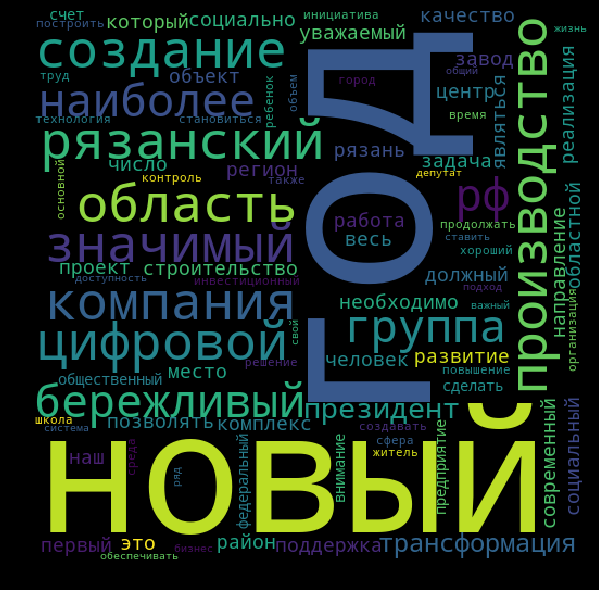

In [14]:
wc = WordCloud(width = 512,height = 512).generate(' '.join(rzn_top_100))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()